<a href="https://colab.research.google.com/github/Michaelzats/Assets-optimisation-predictor/blob/main/Assets_Comparison_Crypto_comparison_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -q yfinance


     |████████████████████████████████| 6.4 MB 11.7 MB/s 
     |████████████████████████████████| 63 kB 1.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


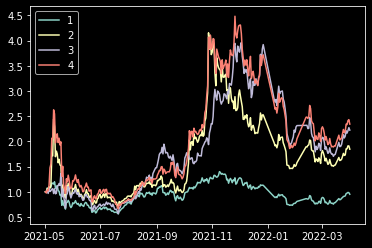

In [ ]:
# ASSETS ALLOCATION 
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


#WRITE YOUR ASSETS PROPORTION HERE

weightings1 = {"ETH-USD":"50","BTC-USD":"50"}
weightings2 = {"ETH-USD":"43","BTC-USD":"26","ENJ-USD":"9","LINK-USD":"9","SHIB-USD":"8","CHZ-USD":"5"}
weightings3 = {"BNB-USD":"23","DOGE-USD":"10","HNT-USD":"5","MATIC-USD":"19","SAND-USD":"16","SOL-USD":"27"}
weightings4 = {"ETH-USD":"18","DOGE-USD":"15","SOL-USD":"11","ADA-USD":"7","SHIB-USD":"7","GRT-USD":"4","ENJ-USD":"4","MANA-USD":"4","FIL-USD":"4","LINK-USD":"4","CRV-USD":"4","CRO-USD":"4","MATIC-USD":"4","GALA-USD":"4","CHZ-USD":"4","SUSHI-USD":"2"}



# weightings4 = {"DOGE-USD":9,"CHZ-USD":"8","ETH-USD":"45","ANKR-USD":"20","ADA-USD":"19"}
# weightings5 = {"DOGE-USD":"9","ETH-USD":'46',"ANKR-USD":'20',"ADA-USD":"17","CHZ-USD":"8"}
# weightings1 = {"PWR":"19","MCK":'34',"TSLA":'45',"ALB":"2"}
# weightings2 = {"PWR":"2","MCK":"10","ENPH":"10","GOOG":"11","COST":"7","ADM":"13","TSLA":"7","EXC":"3","SIVB":"9","ALB":"15","IRM":"11"}
# weightings3 = {"SPY":"100"}
# weightings4 = {"PWR":"15","MCK":"11","ENPH":"2","GOOG":"9","COST":"3","ADM":"10","TSLA":"14","EXC":"10","SIVB":"13","ALB":"5","IRM":"7"}
# weightings5 = {"ADM":"17","COST":"44","ENPH":"22","PWR":"2","TSLA":"15"}



members = ["AXS-USD","BTC-USD","DOGE-USD","ETH-USD","ANKR-USD","CHZ-USD","BNB-USD","HNT-USD","SAND-USD", "MATIC-USD",
"FIL-USD",
"ENJ-USD",
"MANA-USD",
"CRV-USD",
"GRT-USD",
"LINK-USD",
"ADA-USD",
"CRO-USD",
"SHIB-USD",
"GALA-USD",
"SLP-USD" ,
"SOL-USD",
"SUSHI-USD",
]


def PortfolioCalc(weightings, data, name):
  data[name] = sum([  int(weightings[x])*data[x]/100 for x in list(weightings.keys())   ])
  return data

basedata = yf.Ticker(members[0]).history(period="max").reset_index()[["Date","Open"]]
basedata["Date"] = pd.to_datetime(basedata["Date"])
basedata = basedata.rename(columns = {"Open":members[0]})


if (len(members)>1):
  for x in range(1,len(members)):
    newdata = yf.Ticker(members[x]).history(period="max").reset_index()[["Date","Open"]]
    newdata["Date"] = pd.to_datetime(newdata["Date"])
    newdata = newdata.rename(columns = {"Open":members[x]})
    basedata = pd.merge(basedata, newdata, on="Date")


basedata = basedata[basedata["Date"] > "2021-05-01"]


# print(basedata)

for x in members:
  basedata[x] = basedata[x]/(basedata[x].iloc[0])

basedata = PortfolioCalc(weightings1, basedata, "crypto1")
basedata = PortfolioCalc(weightings2, basedata, "crypto2")
basedata = PortfolioCalc(weightings3, basedata, "crypto3")
basedata = PortfolioCalc(weightings4, basedata, "crypto4")
# basedata = PortfolioCalc(weightings5, basedata, "crypto5")

# for x in members:
#   plt.semilogy(basedata["Date"], basedata[x], label=x)

plt.style.use("dark_background")

plt.plot(basedata["Date"], basedata["crypto1"], label = "1")
plt.plot(basedata["Date"], basedata["crypto2"], label = "2")
plt.plot(basedata["Date"], basedata["crypto3"], label = "3")
plt.plot(basedata["Date"], basedata["crypto4"], label = "4")
# plt.plot(basedata["Date"], basedata["crypto5"], label = "5")

plt.legend(loc="upper left")
plt.show()







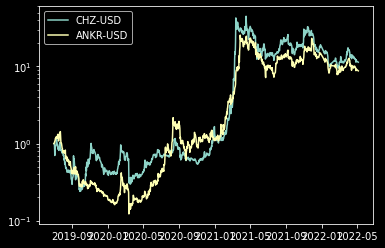

In [ ]:
# WHAT IS THE MOST STRONGEST CRYPTO?
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# weightings3 = {"DOGE-USD":"30","BTC-USD":"30", "ENJ-USD":'40' }



# THE NAME OF THE CRYPTO:
members = ["BTC-USD",
           "ETH-USD", 
           "DOGE-USD", 
           "ENJ-USD", 
           "SKL-USD", 
           "SHIB-USD", 
           "LTC-USD", 
           "LINK-USD", 
           "FIL-USD", 
           "CHZ-USD", 
           "ANK-USD", 
           "ADA-USD", 
           "XRP-USD", 
           "ATOM-USD"]




def PortfolioCalc(weightings, data, name):
  data[name] = sum([  int(weightings[x])*data[x]/100 for x in list(weightings.keys())   ])
  return data

basedata = yf.Ticker(members[0]).history(period="max").reset_index()[["Date","Open"]]
basedata["Date"] = pd.to_datetime(basedata["Date"])
basedata = basedata.rename(columns = {"Open":members[0]})


if (len(members)>1):
  for x in range(1,len(members)):
    newdata = yf.Ticker(members[x]).history(period="max").reset_index()[["Date","Open"]]
    newdata["Date"] = pd.to_datetime(newdata["Date"])
    newdata = newdata.rename(columns = {"Open":members[x]})
    basedata = pd.merge(basedata, newdata, on="Date")


basedata = basedata[  basedata["Date"] > "2016-01-01"]


# print(basedata)

for x in members:
  basedata[x] = basedata[x]/(basedata[x].iloc[0])


for x in members:
  plt.semilogy(basedata["Date"], basedata[x], label=x)

plt.legend(loc="upper left")







           Date       BTC-USD         SPY
326  2016-01-04    430.061005  179.081557
327  2016-01-05    433.069000  179.894350
328  2016-01-06    431.855988  177.161150
329  2016-01-07    430.010986  174.472559
330  2016-01-08    457.537994  174.347529
...         ...           ...         ...
1915 2022-04-26  40448.421875  425.829987
1916 2022-04-27  38120.300781  417.239990
1917 2022-04-28  39241.429688  422.290009
1918 2022-04-29  39768.617188  423.589996
1919 2022-05-02  38491.511719  412.070007

[1594 rows x 3 columns]


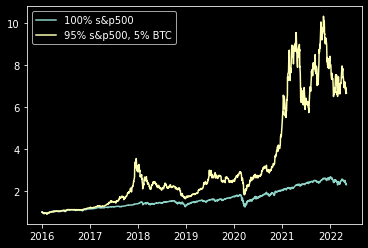

In [ ]:
# Original Code

import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


weightings1 = {"SPY":"100"}
weightings2 = {"SPY":"95","BTC-USD":"5"}


members = ["BTC-USD","SPY"]


def PortfolioCalc(weightings, data, name):
  data[name] = sum([  int(weightings[x])*data[x]/100 for x in list(weightings.keys())   ])
  return data

basedata = yf.Ticker(members[0]).history(period="max").reset_index()[["Date","Open"]]
basedata["Date"] = pd.to_datetime(basedata["Date"])
basedata = basedata.rename(columns = {"Open":members[0]})


if (len(members)>1):
  for x in range(1,len(members)):
    newdata = yf.Ticker(members[x]).history(period="max").reset_index()[["Date","Open"]]
    newdata["Date"] = pd.to_datetime(newdata["Date"])
    newdata = newdata.rename(columns = {"Open":members[x]})
    basedata = pd.merge(basedata, newdata, on="Date")


basedata = basedata[  basedata["Date"] > "2016-01-01"]


print(basedata)

for x in members:
  basedata[x] = basedata[x]/(basedata[x].iloc[0])

basedata = PortfolioCalc(weightings1, basedata, "crypto1")
basedata = PortfolioCalc(weightings2, basedata, "crypto2")

#for x in members:
  #plt.semilogy(basedata["Date"], basedata[x], label=x)

plt.style.use("dark_background")

plt.plot(basedata["Date"], basedata["crypto1"], label = "100% s&p500")
plt.plot(basedata["Date"], basedata["crypto2"], label = "95% s&p500, 5% BTC")

plt.legend(loc="upper left")
plt.show()
















